In [1]:
import util


In [2]:
df = util.get_NLP_df()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             500 non-null    object
 1   language         481 non-null    object
 2   readme_contents  500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [3]:
df = util.get_labeled_df()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            440 non-null    int64 
 1   repo             440 non-null    object
 2   language         440 non-null    object
 3   readme_contents  440 non-null    object
 4   content          440 non-null    object
 5   stemmed_content  440 non-null    object
 6   lemmed_content   440 non-null    object
dtypes: int64(1), object(6)
memory usage: 27.5+ KB


In [4]:
df = util.remove_under_represented_values()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 439
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            418 non-null    int64 
 1   repo             418 non-null    object
 2   language         418 non-null    object
 3   readme_contents  418 non-null    object
 4   content          418 non-null    object
 5   stemmed_content  418 non-null    object
 6   lemmed_content   418 non-null    object
dtypes: int64(1), object(6)
memory usage: 26.1+ KB


### Notes for above sections: 
- Introduce data source, acquisition, and cleaning process that reduced the number of repos in the dataframe down to 418, from the original 500 acquired

In [5]:
train, validate, test = util.split_and_vectorize(df)

233 101 84


In [6]:
X_train, y_train, X_validate, y_validate, X_test, y_test = util.build_X_and_y(train, validate, test)

In [7]:
df = util.DTC_model_and_df(X_train, y_train, X_validate, y_validate)
df.head(3)

,max_depth,training_accuracy,validate_accuracy,difference
8,9,0.613734,0.425743,0.187991
9,10,0.635193,0.425743,0.209451
7,8,0.583691,0.405941,0.177750


<Figure size 864x648 with 0 Axes>

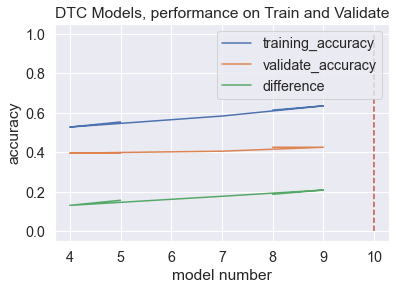

In [8]:
util.visualize_DTC(df)

In [9]:
df = util.RFC_model_and_df(X_train, y_train, X_validate, y_validate)
df.head(3)

,max_depth,min_samples_leaf,training_accuracy,validate_accuracy,difference
196,14,2,0.630901,0.386139,0.244763
211,15,2,0.639485,0.386139,0.253346
181,13,2,0.618026,0.376238,0.241788


In [10]:
util.visualize_RFC(df)

AttributeError: module 'util' has no attribute 'visualize_RFC'

In [ ]:
df = util.LRC_model_and_df(X_train, y_train, X_validate, y_validate)
df.head(3)

KeyError: 'difference'

In [ ]:
util.visualze_LRC(df)